# Exercise 3: Model Calibration

In [4]:
# Load libraries
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

# Use scipy.optimize.minimize to mnimizes sum of squared errors function
from scipy.optimize import minimize

In [5]:
%matplotlib inline

In [7]:
# Load plague Data
plague_dat = pd.read_csv('../../plague_data.csv')
plague_dat['time'] = plague_dat.index.values

plague_dat.head()

,Week_of_year,Deaths,time
0,39,31,0
1,40,18,1
2,41,12,2
3,42,9,3
4,43,13,4


In [8]:
# Define a function for numerically integrating the SIR model
def sir_model(state, time, parameters):
    # Unpack Parameters
    S, I, R = state
    beta, gamma = parameters
    
    # Calculate total population size
    N = S + I + R
    
    # Calculate force of infection
    lambd = beta * I / N
    
    # Calculate derivatives
    dS = -lambd * S
    dI = lambd * S - gamma * I
    dR = gamma * I
    
    # Return derivative
    return [dS, dI, dR]

Define a cost function for quantifying the sum of squared errors - the difference between the data and our model:

## Question: What is R0 for your fitted model?

In [9]:
def sir_sse(parameters, times, dat):
    # Calculate model output
    output = odeint(sir_model, initial_state_values, times, args=(parameters,))
    output = pd.DataFrame(output, columns=['S', 'I', 'R'])
    output['time'] = output.index + 10 # plus nine, because we are going to start on week 10
    
    # Merge with data
    output = pd.merge(output, dat, on='time')
    
    # Calculate sum of squared errors (SSE)
    output['sse'] = (output['I'] - output['Deaths'])**2
    
    sse = output['sse'].sum()
    
    return sse

In [10]:
parameters = {'beta': 1.0, 'gamma': 0.5}

# Define times - start at week 10
times = np.arange(10, 61, 1)

# Initial state values
initial_state_values = [54999, 1, 0]

# Perform the minimization of Sum of Squared Errors
fitval = minimize(sir_sse, x0=list(parameters.values()), args=(times, plague_dat,), method='BFGS')

# Parameter values from the optimization:
fitval_params = fitval.x

In [11]:
fitval_params

array([2.67546942, 2.20012301])

In [7]:
# Solve the model with the optimized parameters
sir_fit = odeint(sir_model, initial_state_values, times, args=(fitval_params,))
sir_fit = pd.DataFrame(sir_fit, columns=['S', 'I', 'R'])
sir_fit['time'] = times

Create a plot

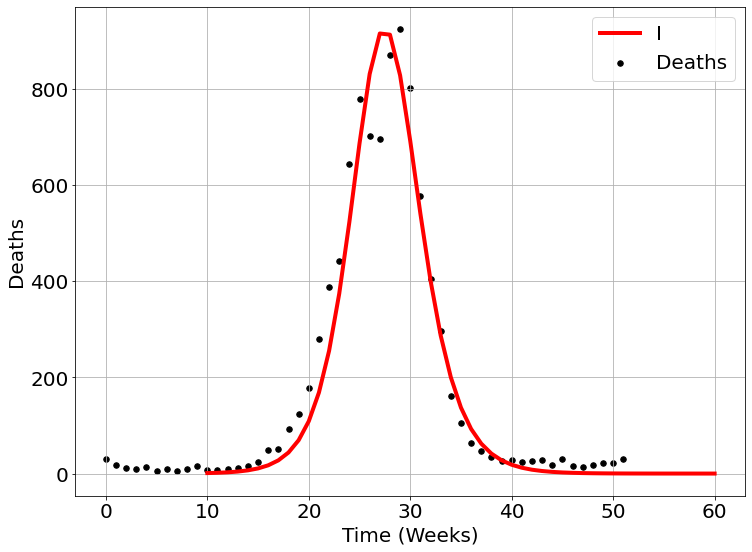

In [8]:
plt.figure(figsize = (12,9))
plt.plot(sir_fit['time'], sir_fit['I'], color='red', linewidth=4, label='I')
plt.scatter(plague_dat['time'], plague_dat['Deaths'], color='black', s=30, label='Deaths')
plt.xlabel("Time (Weeks)",fontsize = 20)
plt.ylabel("Deaths",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.grid(True)
plt.show()

## Question: What is R0 for your fitted model?

In [9]:
fitval_params[0]/fitval_params[1]

1.2160544687197459

## Question: What do you notice about your fitted model?
Look at the plot above: what do you notice about it? Where does it do a good job of fitting the data? Where does it fail to fit the data?

What might we change about the assumptions of our model to improve the model fit?

## Question: What is missing from our model?

The SIR model is very simplistic - can you think of any aspects of disease transmission which we could add to our model in order to make the fit more realistic?



## Optional questions to consider

* If we vary the initial guess for the parameters, does the answer change in a meaningful way
* What happens if we do not assume that the initial population size is known at the start? How should we change the calibration?
* What happens if we assume that not all cases are reported on, and that the data represented here are systematically under-counting, but we do not know by how much? How should we change the calibration?
